In [17]:
import tensorflow_datasets as tfds
import tensorflow as tf
import logging, os
import matplotlib.pyplot as plt

BASE_PATH = "../../../../../local_data/practice/tfds"
DATA_PATH = "../../../../../local_data/tfds/"
OUTPUT_PATH = BASE_PATH+"errors/"
os.system("mkdir -p " + OUTPUT_PATH)

datasets=[
        'mnist',
        'cifar10',
        'tf_flowers',
        'cats_vs_dogs',
]

train_ds, ds_info = tfds.load(datasets[1],
                data_dir=DATA_PATH,
                split='train',
                with_info=True,
                as_supervised=True, 
        )
print(f"Number of training samples: {train_ds.cardinality()}")

Number of training samples: 50000


<_PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


2025-07-01 21:41:00.696199: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


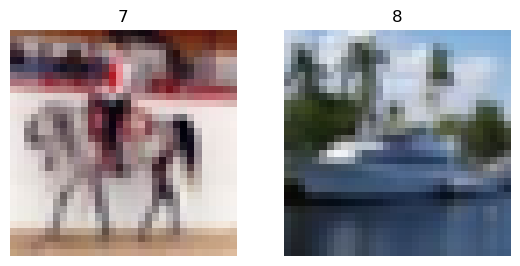

In [18]:
print(train_ds)
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(2)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [19]:
batch_size = 32
train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


2025-07-01 21:41:00.876058: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-07-01 21:41:00.876145: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


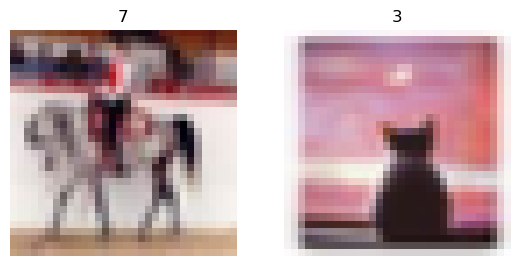

In [20]:
print(train_ds)
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(2)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[0])
    plt.title(int(label[0]))
    plt.axis("off")